# Widgets for Sage : _Sage Combinat  Widgets_ & _Francy_
Cernay, 18th June 2019

# Sage Combinat Widgets
Representing combinatorial objects interactively

In [1]:
from sage_combinat_widgets import *
t = StandardTableaux(15).random_element()
wt = GridViewWidget(t)
wt

HTML(value="<style>.widget-text INPUT {border-collapse: collapse !important}\n.gridbutton {margin:0; padding:0…

GridViewWidget(value=[[1, 2, 3, 6, 13], [4, 9, 10], [5, 12, 14], [7], [8], [11], [15]], children=(HBox(childre…

In [2]:
%display unicode_art
wt.value

┌────┬────┬────┬───┬────┐
│ 1  │ 2  │ 3  │ 6 │ 13 │
├────┼────┼────┼───┴────┘
│ 4  │ 9  │ 10 │
├────┼────┼────┤
│ 5  │ 12 │ 14 │
├────┼────┴────┘
│ 7  │
├────┤
│ 8  │
├────┤
│ 11 │
├────┤
│ 15 │
└────┘

## Configuring cells



In [3]:
from sage_combinat_widgets.grid_view_widget import ButtonCell, AddableButtonCell

GridViewWidget(SkewPartition([[7, 4, 2, 1],[2, 1, 1]]), 
               cell_widget_classes=[ButtonCell],
               addable_widget_class=AddableButtonCell,
               display_convention='fr')

GridViewWidget(value=[7, 4, 2, 1] / [2, 1, 1], children=(HBox(children=(AddableButtonCell(value=False, descrip…

In [4]:
from sage.graphs.generators.families import AztecDiamondGraph
g = AztecDiamondGraph(8)

In [5]:
%%html
<style>
.b1 {background-color: green}
.b2 {background-color: blue}
.b3 {background-color: red}
.b4 {background-color: yellow}
</style>

In [6]:
from sage_combinat_widgets import GridViewWidget, styled_push_button
from ipywidgets import Layout
smallblyt = Layout(width='12px',height='12px', margin='0', padding='0')
Button1 = styled_push_button(disabled=True, style_name='b1')
Button2 = styled_push_button(disabled=True, style_name='b2')
Button3 = styled_push_button(disabled=True, style_name='b3')
Button4 = styled_push_button(disabled=True, style_name='b4')
GridViewWidget(g, cell_layout=smallblyt,
            cell_widget_classes=[Button1, Button2, Button3, Button4],
            cell_widget_class_index = lambda pos:(((1+pos[0])%4 + (2-pos[1])%2)%4)
            )

GridViewWidget(value=Aztec Diamond graph of order 8, children=(HBox(children=(BlankCell(value='', disabled=Tru…

## As building block for interactive applications

In [7]:
%display unicode_art
from sage_combinat_widgets.grid_view_widget import PartitionGridViewWidget
p_input = PartitionGridViewWidget(Partition([2,1]))
@interact
def f(p = p_input):
    return Tableau(p.hook_lengths())

Interactive function <function f at 0x7f1951aa0d08> with 1 widget
  p: GridViewWidget(value=[2, 1], children=(…

As a more advanced application, we build a mini application for interactively exploring products of Schur functions:

In [8]:
S = SymmetricFunctions(QQ)
s = S.s()
la_input = PartitionGridViewWidget(Partition([2,1]))
mu_input = PartitionGridViewWidget(Partition([2,1]))
@interact
def f(la = la_input, mu = mu_input):
    return s[la] * s[mu]

Interactive function <function f at 0x7f195184b9d8> with 2 widgets
  la: GridViewWidget(value=[2, 1], children…

_**NB : sage-combinat-widgets can also be used as components in complex layouts, like for example in the Sage Explorer**_

## Adapters

We _may_ need to define such methods:

- `compute_cells(obj)` that builds the cells as a _position to value_ dictionary 
- mathematical cell content to widget cell content as `cell_to_display(val)`
- the reverse as `display_to_cell(disp_val)` (for dealing with various types) 
- accessors as `get_cell(pos)`, `set_cell(pos, val)`
- operations like adding/removing a cell as `add_cell`/`remove_cell`, adding a row as `add_row`, and more

_All modification operations should return a new Sage object_

## Create your own

In [9]:
from sage.combinat.permutation import *
from sage_widget_adapters.generic_grid_view_adapter import GridViewAdapter # Base adapter

class PermutationGridViewAdapter(GridViewAdapter):
    objclass = Permutation
    celltype = Integer
    cellzero = 0

    @staticmethod
    def compute_cells(obj):
        return {(0,i):obj[i] for i in range(len(obj))}

pa = PermutationGridViewAdapter()

from sage_combinat_widgets import GridViewWidget, BlankButton
p0 = Permutation([2,3,4,5,1])
wp = GridViewWidget(p0, pa)
wp

GridViewWidget(value=[2, 3, 4, 5, 1], children=(HBox(children=(TextCell(value='2', continuous_update=False, la…

### We can configure actions on our push buttons.

In [10]:
from ipywidgets import Button, HBox, Layout
blyt = Layout(width='30px', height='30px')
b1 = Button(description='+', layout=blyt)
b2 = Button(description='-', layout=blyt)
def move(b):
    wp.value = p0 * wp.value
b1.on_click(move)
def back(b):
    wp.pop_value()
b2.on_click(back)
b0 = BlankButton() # just a spacer
HBox([wp,b0,b2,b1])

## You can contribute better examples!

$ pip install sage-combinat-widgets _# needs Sage and Jupyter_

http://github.com/sagemath/sage-combinat-widgets

<odile.benassy@u-psud.fr>

# Francy

- A GAP/Javascript library by Manuel Machado Martins

https://github.com/gap-packages

- in GAP language, encodes graphs, charts .. into JSON strings

- sends JSON to Jupyter

- with dedicated Javascript adapters, use various JS libraries to display the graph (or chart ..)

- currently D3, GraphViz and Vis

I currently contribute a Jupyter widget written in Python3, usable with Jupyter kernels based on Py3 (such as Sage kernels)

https://github.com/zerline/francy-widget/

## S4

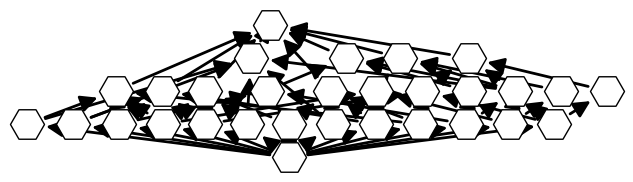

In [11]:
S4 = SymmetricGroup(4)
N = S4.subgroups()
P = Poset((N, lambda h,k: h.is_subgroup(k)))
P.plot(label_elements=False, vertex_shape= 'H', vertex_size = 600, vertex_color = 'white')

In [12]:
D = P.hasse_diagram()
import networkx
G7 = networkx.Graph()
G7.add_edges_from([(e[0], e[1]) for e in D.edges()])

For specific layout options, we write a function called _node__options_ , that should return an _options_ dictionary. In our case:
- Normal subgroups will be highlighted with a diamond shaped node
- Conjugacy classes will be grouped in the final layout

In [13]:
# Conjugality classes
conjugates = {}
conjugacy_class = {}
for count,c in enumerate(S4._gap_().ConjugacyClassesSubgroups()):
    cl = int(count + 1)
    conjugates[cl] = []
    for s in c.List():
        conjugates[cl].append(S4.subgroup(gap_group=s))
        conjugacy_class[S4.subgroup(gap_group=s)] = cl

def node_options(n):
    options = {}
    options['layer'] = - conjugacy_class[n]
    if n.is_normal():
        options['type'] = 'diamond'       
    else:
        options['type'] = 'circle'        
    if n.cardinality() == 24:
        options['title'] = 'G'
        options['conjugate'] = 0
    else:
        options['title'] = str(conjugacy_class[n])
        options['conjugate'] = conjugacy_class[n]
    return options

In [14]:
from francy_widget import FrancyWidget, FrancyMessage
FrancyWidget(G7, 
                  title="S4", counter=45, height=600, weight=0,
                  messages=["There are 8 levels in this Group."],
                  node_options=node_options)

FrancyWidget(value=<networkx.classes.graph.Graph object at 0x7f19501b3080>)

## Emmy Noether's descent

Amalie Emmy Noether (23 March 1882 – 14 April 1935) was a German mathematician who made important contributions to abstract algebra and theoretical physics (https://en.wikipedia.org/wiki/Emmy_Noether).

According to the math genealogy project, Emmy Noether had 14 doctoral students, who had 76 themselves, ... so until now she has *1365* descendants.

In [17]:
import networkx, json
from francy_widget import FrancyWidget
G = networkx.DiGraph()
data = json.load(open("noether.json"))
nodes = data["nodes"]
print(len(nodes))
nodes_to_keep = {k:nodes[k] for k in nodes if nodes[k][0]<4}
print(len(nodes_to_keep), "nodes")
edges_to_keep = [e for e in data["edges"] if e[1] in nodes_to_keep]
G.add_edges_from(edges_to_keep)
def node_options(n):
    options = {}
    d = nodes[n]
    options["layer"] = d[0]
    options["title"] = "%s (%s)" % (d[2].split(",")[0], d[3])
    if n in ["6967", "63779", "6982", "29850", "121808", "191816", "54355", "98035", "44616", "57077", "21851"]:
        options["type"] = 'diamond' # women
    else:
        options["type"] = 'circle' # men
    return options
FrancyWidget(G, graphType="directed", height=800, zoomToFit=False,
             node_options=node_options)

1365
91 nodes


FrancyWidget(value=<networkx.classes.digraph.DiGraph object at 0x7f194c74d160>)

# Thanks!